In [1]:
import pandas as pd

# Read in each csv file
double check variable types and ranges look good

In [2]:
file_list = ["run_number.csv","daq_status.csv","cbrem_plane.csv","goni_roll.csv","goni_roll_rbv.csv","goni_x.csv","goni_x_rbv.csv","goni_y.csv","goni_y_rbv.csv","goni_pitch.csv","goni_pitch_rbv.csv","goni_yaw.csv","goni_yaw_rbv.csv","ac_x.csv","ac_y.csv","ebeam_current.csv","ebeam_energy.csv","ebeam_x.csv","ebeam_y.csv","photonbeam_energy_desired.csv","photonbeam_energy_uncertainty.csv","photonbeam_energy.csv","radiator_id.csv","radiator_name.csv"]
col_names = ['RunNumber','DAQ:STATUS','CBREM:PLANE','GONI:ROLL','GONI:ROLL.RBV','GONI:X','GONI:X.RBV','GONI:Y','GONI:Y.RBV','GONI:PITCH','GONI:PITCH.RBV','GONI:YAW','GONI:YAW.RBV','AC:X',"AC:Y","EBEAM:CURRENT","EBEAM:ENERGY","EBEAM:X","EBEAM:Y","CBREM:SET_ENERGY","CBREM:ENERGY_UNC","CBREM:ENERGY","RADIATOR:ID","RADIATOR:NAME"]


In [3]:

def read_dfs(run_period):
    df_list = []

    # loop over run periods
    if run_period=='Spring2023':
        file_list.append('beam_lock.csv')
        col_names.append('EBEAM:LOCK')
    for i in range(len(file_list)):

        df_tmp = pd.read_csv("csv_data/initial_converted/"+run_period+"/"+file_list[i])

        df_tmp.columns = ['Date-Time',col_names[i]]


        df_list.append(df_tmp)
    
    return df_list

In [4]:
df_list_spring20 = read_dfs('Spring2020')
df_list_spring23 = read_dfs('Spring2023')
df_list_spring25 = read_dfs('Spring2025')

# Merge small dataframes into big dataframe
Do outer join on Date-Time, most variables can be forward-filled. 

In [5]:
import functools as ft 

df_spring20 = ft.reduce(lambda left, right: pd.merge(left,right, on='Date-Time',how='outer'),df_list_spring20)
df_spring23 = ft.reduce(lambda left, right: pd.merge(left,right, on='Date-Time',how='outer'),df_list_spring23)
df_spring25 = ft.reduce(lambda left, right: pd.merge(left,right, on='Date-Time',how='outer'),df_list_spring25)

In [6]:
print(df_spring20.head(10))
print(df_spring23.head(10))
print(df_spring25.head(10))

             Date-Time  RunNumber  DAQ:STATUS  CBREM:PLANE  GONI:ROLL  \
0  2020-01-10T00:00:00        NaN         NaN          NaN        NaN   
1  2020-01-10T00:00:01        NaN         NaN          NaN        NaN   
2  2020-01-10T00:00:02        NaN         NaN          NaN        NaN   
3  2020-01-10T00:00:03        NaN         NaN          NaN        NaN   
4  2020-01-10T00:00:04        NaN         NaN          NaN        NaN   
5  2020-01-10T00:00:05        NaN         NaN          NaN        NaN   
6  2020-01-10T00:00:06        NaN         NaN          NaN        NaN   
7  2020-01-10T00:00:07        NaN         NaN          NaN        NaN   
8  2020-01-10T00:00:08        NaN         NaN          NaN        NaN   
9  2020-01-10T00:00:09        NaN         NaN          NaN        NaN   

   GONI:ROLL.RBV  GONI:X  GONI:X.RBV  GONI:Y  GONI:Y.RBV  ...      AC:Y  \
0            NaN     NaN         NaN     NaN         NaN  ... -0.635395   
1            NaN     NaN         NaN     NaN  

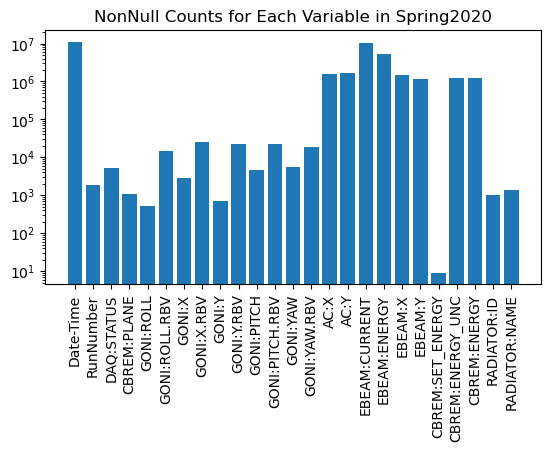

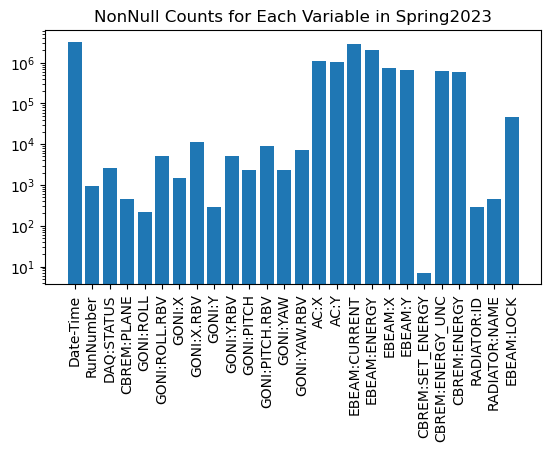

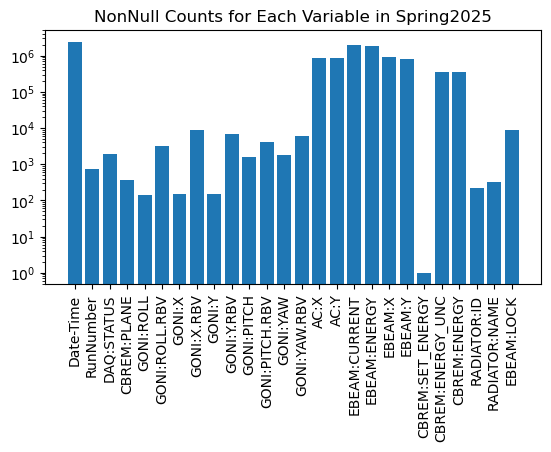

<Figure size 640x480 with 0 Axes>

In [7]:
# here we are curious how many non-null values each variable has out of the box
import matplotlib.pyplot as plt

df_list = [df_spring20,df_spring23,df_spring25]
run_periods = ["Spring2020","Spring2023","Spring2025"]

for i in range(len(df_list)):

    df_tmp = df_list[i]

    xvals = [i for i in range(len(df_tmp.columns))]
    yvals = [df_tmp[variable].count() for variable in df_tmp.columns]

    ax = plt.subplot()
    plt.subplots_adjust(bottom=0.35)
    plt.bar(xvals,yvals)
    plt.title('NonNull Counts for Each Variable in '+run_periods[i])
    ax.set_xticks(xvals,df_tmp.columns)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.savefig('plots/nonNull_variableCounts_'+run_periods[i]+'.pdf')
    plt.show()
    plt.clf()

In [8]:
print(df_spring20.info(show_counts=True))
print(df_spring23.info(show_counts=True))
print(df_spring25.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11267760 entries, 0 to 11267759
Data columns (total 25 columns):
 #   Column            Non-Null Count     Dtype  
---  ------            --------------     -----  
 0   Date-Time         11267760 non-null  object 
 1   RunNumber         1918 non-null      float64
 2   DAQ:STATUS        5325 non-null      float64
 3   CBREM:PLANE       1110 non-null      float64
 4   GONI:ROLL         516 non-null       float64
 5   GONI:ROLL.RBV     14984 non-null     float64
 6   GONI:X            2782 non-null      float64
 7   GONI:X.RBV        25302 non-null     float64
 8   GONI:Y            685 non-null       float64
 9   GONI:Y.RBV        22460 non-null     float64
 10  GONI:PITCH        4733 non-null      float64
 11  GONI:PITCH.RBV    22050 non-null     float64
 12  GONI:YAW          5687 non-null      float64
 13  GONI:YAW.RBV      19096 non-null     float64
 14  AC:X              1603872 non-null   float64
 15  AC:Y              1645795 non-

In [9]:
df_spring25.drop('CBREM:SET_ENERGY',axis=1,inplace=True)

In [10]:
# these are all set points or measurements for the controls 
# nans occur during outer join when there is no updated value for a column 
# forward filling is appropriate here, since it is the last measured value
df_spring20 = df_spring20.ffill() 
df_spring23 = df_spring23.ffill()
df_spring25 = df_spring25.ffill()

In [11]:
# back fill to fill in initial rows 
# ideally would drop nans instead, but some variables (like setpoint energy) are very sparse, which can result in large swaths of data being lost
df_spring20 = df_spring20.bfill() 
df_spring23 = df_spring23.bfill()
df_spring25 = df_spring25.bfill()

In [12]:
print(df_spring20.info(show_counts=True))
print(df_spring23.info(show_counts=True))
print(df_spring25.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11267760 entries, 0 to 11267759
Data columns (total 25 columns):
 #   Column            Non-Null Count     Dtype  
---  ------            --------------     -----  
 0   Date-Time         11267760 non-null  object 
 1   RunNumber         11267760 non-null  float64
 2   DAQ:STATUS        11267760 non-null  float64
 3   CBREM:PLANE       11267760 non-null  float64
 4   GONI:ROLL         11267760 non-null  float64
 5   GONI:ROLL.RBV     11267760 non-null  float64
 6   GONI:X            11267760 non-null  float64
 7   GONI:X.RBV        11267760 non-null  float64
 8   GONI:Y            11267760 non-null  float64
 9   GONI:Y.RBV        11267760 non-null  float64
 10  GONI:PITCH        11267760 non-null  float64
 11  GONI:PITCH.RBV    11267760 non-null  float64
 12  GONI:YAW          11267760 non-null  float64
 13  GONI:YAW.RBV      11267760 non-null  float64
 14  AC:X              11267760 non-null  float64
 15  AC:Y              11267760 non

In [13]:
# convert RunNumber, DAQ:STATUS, CBREM:PLANE to int 
pd.set_option('display.max_rows', None)

for df_tmp in df_list:
    df_tmp.dropna(inplace=True)
    df_tmp['RunNumber'] = df_tmp['RunNumber'].astype(int)
    df_tmp['DAQ:STATUS'] = df_tmp['DAQ:STATUS'].astype(int)
    df_tmp['CBREM:PLANE'] = df_tmp['CBREM:PLANE'].astype(int)
    df_tmp['RADIATOR:ID'] = df_tmp['RADIATOR:ID'].astype(int)

In [14]:
# good runs comes from RCDB query @is_dirc_production and @status_approved
good_runs_spring20 =[73266,73263,73262,73261,73260,73231,73230,73229,73228,73227,73226,73225,73224,73223,73222,73220,73219,73218,73217,73215,73214,73213,73212,73211,73210,73209,73208,73207,73191,73190,73188,73187,73186,73185,73184,73183,73182,73180,73179,73178,73177,73176,73175,73174,73173,73172,73171,73169,73168,73167,73166,73165,73164,73163,73162,73161,73160,73151,73150,73149,73148,73147,73146,73145,73144,73143,73132,73131,73130,73129,73127,73126,73125,73124,73123,73122,73121,73120,73119,73118,73117,73116,73115,73112,73108,73104,73102,73099,73096,73095,73094,73093,73092,73090,73089,73088,73087,73086,73085,73083,73082,73081,73079,73078,73077,73076,73075,73074,73073,73072,73071,73070,73069,73068,73067,73066,73065,73064,73063,73062,73061,73060,73059,73058,73057,73056,73055,73054,73053,73052,73051,73050,73049,73048,73047,73045,73044,73043,73042,73041,73040,73039,73038,72948,72947,72946,72944,72930,72929,72928,72927,72926,72925,72924,72923,72922,72921,72920,72919,72917,72916,72912,72911,72910,72909,72897,72890,72889,72888,72887,72883,72882,72881,72880,72879,72878,72872,72871,72870,72869,72868,72867,72864,72863,72862,72861,72860,72859,72858,72857,72855,72854,72852,72851,72850,72849,72848,72847,72846,72845,72844,72843,72842,72841,72840,72838,72837,72836,72835,72834,72833,72832,72831,72830,72829,72828,72827,72826,72825,72824,72823,72822,72816,72815,72814,72813,72812,72811,72801,72800,72799,72798,72797,72796,72795,72794,72793,72792,72791,72790,72789,72788,72786,72785,72783,72782,72781,72780,72779,72778,72776,72775,72774,72773,72772,72771,72770,72768,72763,72762,72761,72760,72759,72757,72756,72754,72753,72752,72751,72750,72749,72748,72747,72746,72745,72744,72743,72742,72741,72740,72739,72738,72737,72736,72734,72733,72732,72731,72730,72729,72728,72726,72725,72723,72722,72721,72720,72719,72717,72715,72714,72713,72710,72708,72707,72705,72704,72703,72702,72695,72690,72689,72688,72686,72684,72680,72679,72678,72677,72676,72673,72672,72670,72669,72668,72667,72666,72665,72663,72662,72661,72659,72658,72657,72656,72655,72654,72653,72651,72650,72649,72646,72645,72435,72434,72431,72428,72427,72426,72424,72423,72422,72420,72419,72418,72416,72414,72413,72412,72411,72410,72409,72408,72407,72406,72405,72404,72403,72401,72399,72398,72396,72395,72394,72393,72392,72391,72390,72389,72388,72387,72386,72385,72383,72381,72380,72379,72378,72377,72376,72375,72374,72372,72371,72370,72369,72368,72367,72366,72365,72364,72363,72362,72303,72302,72301,72299,72298,72297,72296,72295,72294,72293,72285,72284,72283,72282,72281,72280,72274,72273,72272,72267,72266,72265,72264,72263,72262,72261,72260,72259,72258,72257,72256,72251,72250,72249,72248,72247,72246,72245,72243,72241,72239,72238,72197,72196,72195,72194,72193,72191,72190,72189,72188,72186,72185,72184,72182,72181,72180,72179,72178,72177,72176,72175,72173,72172,72169,72168,72167,72166,72165,72164,72162,72160,72159,72158,72157,72156,72155,72154,72151,72149,72148,72147,72146,72145,72144,72142,72141,72138,72137,72136,72135,72134,72133,72132,72131,72130,72129,72128,72127,72126,72125,72124,72122,72121,72120,72119,72118,72117,72116,72114,72112,72111,72110,72109,72108,72107,72106,72105,72103,72102,72101,72100,72099,72095,72094,72092,72091,72090,72089,72087,72086,72085,72084,72083,72082,72081,72080,72079,72078,72077,72076,72075,72074,72073,72071,72070,72068,72067,72066,72065,72064,72063,72062,72061,72060,72059,72058,72057,72056,72055,72053,72052,72050,72048,72047,72046,72045,72043,72042,72041,72040,72039,72038,72037,72036,72034,72033,72031,72019,72018,72017,72016,72014,72013,72012,72011,72010,72009,72008,72007,72005,72004,72003,71999,71994,71993,71992,71991,71990,71982,71981,71980,71979,71978,71977,71976,71973,71972,71971,71970,71969,71968,71953,71952,71951,71950,71949,71947,71946,71945,71944,71943,71942,71940,71939,71938,71937,71936,71935,71934,71933,71927,71926,71925,71924,71923,71922,71921,71920,71919,71918,71916,71913,71912,71911,71910,71909,71908,71907,71906,71905,71904,71899,71898,71897,71896,71895,71894,71892,71891,71890,71889,71888,71887,71886,71885,71884,71883,71882,71881,71880,71879,71878,71877,71876,71875,71873,71872,71871,71870,71869,71868,71867,71865,71864,71863,71855,71854,71853,71852,71851,71850,71849,71848,71847,71846,71842,71841,71840,71839,71838,71837,71836,71835,71834,71833,71832,71831,71830,71827,71826,71825,71824,71823,71822,71821,71820,71819,71817,71815,71814,71813,71810,71809,71808,71807,71806,71800,71795,71794,71793,71792,71791,71790,71789,71786,71785,71784,71783,71782,71781,71780,71778,71777,71776,71775,71774,71773,71772,71770,71769,71768,71767,71766,71765,71763,71762,71761,71760,71759,71758,71757,71755,71754,71753,71752,71751,71748,71747,71743,71742,71740,71739,71737,71736,71735,71734,71729,71728,71727,71725,71724,71722,71721,71719,71718,71717,71716,71715,71714,71705,71704,71703,71701,71700,71699,71698,71697,71696,71695,71694,71693,71692,71691,71690,71689,71687,71686,71685,71684,71683,71681,71680,71679,71678,71677,71676,71675,71674,71672,71670,71669,71668,71667,71666,71663,71662,71661,71658,71656,71655,71654,71653,71652,71649,71648,71647,71646,71645,71644,71643,71641,71640,71638,71637,71635,71632,71631,71630,71629,71628,71627,71626,71625,71623,71619,71618,71617,71615,71614,71612,71603,71598,71597,71596,71594,71593,71592,71591,71590,71589,71588,71587,71586,71585,71563,71562,71561,71560,71559,71558,71557,71556,71554,71553,71551,71550,71545,71544,71543,71540,71539,71538,71537,71536,71535,71530,71529,71528,71527,71526,71525,71524,71522,71521,71520,71519,71518,71517,71516,71515,71514,71512,71511,71510,71502,71501,71500,71498,71497,71494,71493,71492,71491,71490,71487,71486,71485,71484,71483,71482,71478,71477,71475,71474,71473,71472,71470,71469,71468,71467,71466,71465,71464,71463,71462,71432,71431,71430,71429,71428,71406,71405,71404,71402,71401,71400,71396,71395,71382,71378,71377,71375,71373,71372,71371,71370,71369,71368,71365,71364,71363,71362,71358,71356,71355,71354,71353,71352,71351,71350]


In [15]:
# remove runs where the fit script was broken
df_spring20 = df_spring20[df_spring20['RunNumber']>72094]
# set a goodRun flag equal to whether or not RunNumber is in the set of good runs 
df_spring20['goodRun'] = df_spring20['RunNumber'].isin(good_runs_spring20)
df_spring23['goodRun'] = True 
df_spring25['goodRun'] = True


In [16]:
print(df_spring20.shape)

(7805683, 26)


In [17]:
# need to change run number, so that run number for setup is same as for the actual data acquisition 
# currently, run number only changes when DAQ:STATUS is 1, which is after radiator setup. 

# need to loop through runs. For each run, should see the sequence 0 -> 1 -> 2 for DAQ:STATUS. Once it goes 2->0, next run should start 

def fix_run_numbers(df_tmp):

    df_out = pd.DataFrame()

    run_list = df_tmp['RunNumber'].unique()
    print(min(run_list),'to',max(run_list))

    for run_idx in range(len(run_list)):
        if run_idx%100==0:
            print(run_list[run_idx])
        runVal = run_list[run_idx]
        df_run = df_tmp[df_tmp['RunNumber']==runVal]

        if runVal == max(run_list): 
            df_out = pd.concat([df_out,df_run])
            continue



        daq_on = False
        for i, row in df_run.iterrows():
            daq_status = row['DAQ:STATUS']

            if daq_status == 2:
                #print("daq turned on")
                daq_on = True 
            
            if daq_on and daq_status != 2:
                #print("daq has been on, but not currently on")
                #print("currently assigned run number",runVal)
                #print("should reassign to run",run_list[run_idx+1])

                # need to find index for original data frame
                df_run.at[i,'RunNumber'] = run_list[run_idx+1]
        
        df_out = pd.concat([df_out,df_run])
    return df_out




In [18]:
print(df_spring20['RADIATOR:NAME'].unique())
print(df_spring20['RADIATOR:ID'].unique())

['JD70-105' 'Undefined' '4.5x10-4' 'RETRACTED' 'BLANK' 'JD70-106'
 'JD70-103' 'JD70-109' 'JD70-107']
[11045.     0.  5000. 11000. 16000. 12000. 17045.]


In [19]:
df_spring20_fixed = fix_run_numbers(df_spring20)

72095.0 to 73267.0
72095.0
72195.0
72295.0
72395.0
72495.0
72595.0
72695.0
72795.0
72895.0
72995.0
73095.0
73195.0


In [20]:
df_spring23_fixed = fix_run_numbers(df_spring23)

120286.0 to 121214.0
120286.0
120391.0
120491.0
120591.0
120691.0
120791.0
120891.0
120991.0
121091.0
121191.0


In [21]:
df_spring25_fixed = fix_run_numbers(df_spring25)

131405.0 to 132158.0
131405.0
131505.0
131605.0
131705.0
131805.0
131905.0
132005.0
132105.0


In [22]:
df_spring20 = df_spring20_fixed 
df_spring23 = df_spring23_fixed 
df_spring25 = df_spring25_fixed

In [23]:
from datetime import datetime
time_convert = lambda x: x.timestamp()

df_spring20['Date-Time'] = pd.to_datetime(df_spring20['Date-Time'],errors='coerce')
df_spring20['TimeStamp'] = df_spring20['Date-Time'].apply(time_convert)
df_spring20.set_index('Date-Time',inplace=True)

In [24]:
df_spring23['Date-Time'] = pd.to_datetime(df_spring23['Date-Time'],errors='coerce')
df_spring23['TimeStamp'] = df_spring23['Date-Time'].apply(time_convert)
df_spring23.set_index('Date-Time',inplace=True)

In [25]:
# one row somewhere has a weird Date-Time
df_spring25['Date-Time'] = pd.to_datetime(df_spring25['Date-Time'],errors='coerce')
df_spring25.dropna(inplace=True)
df_spring25['TimeStamp'] = df_spring25['Date-Time'].apply(time_convert)
df_spring25.set_index('Date-Time',inplace=True)

In [26]:
# output .csv files at this stage. Not used anywhere, but to save progress in case kernel dies. keep index since that is date-time
df_spring20.to_csv('csv_data/merged/Spring20_initialMerged.csv')
df_spring23.to_csv('csv_data/merged/Spring23_initialMerged.csv')
df_spring25.to_csv('csv_data/merged/Spring25_initialMerged.csv')

In [27]:
def reduce_seq(nudge_seq):
    # backlash already accounted for, so just cancel out u and d 
    up_count = nudge_seq.count('u')
    down_count = nudge_seq.count('d')
    # final string will either be empty, or just either ups or downs (no mixed)
    if up_count == down_count:
        # same number of up and down nudges, has no effect
        return ''
    if up_count > down_count:
        net_ups = up_count - down_count
        out_str = ""
        for i in range(net_ups):
            out_str+="u"
        return out_str
    if down_count > up_count:
        net_downs = down_count - up_count
        out_str = ""
        for i in range(net_downs):
            out_str+='d'
        return out_str

In [28]:
print(reduce_seq('uudd'))
print(reduce_seq('uuddd'))
print(reduce_seq('uuuuddd'))
print(reduce_seq('uuuud'))
print(reduce_seq(''))


d
u
uuu



In [ ]:
def define_nudge(df_in):
    # now define the nudge sequences for each run 
    run_list = df_in['RunNumber'].unique()
    df_tmp = df_in.copy()

    df_final_out = pd.DataFrame()


    # Run-level properties of the nudges
    df_tmp['NudgeDuringRun'] = False# only true if there was a nudge and DAQ is on (status 2)
    df_tmp['RunHasNudge'] = False
    df_tmp['NudgeOccurred'] = False
    df_tmp['TotalNudgeSize_thisRun'] = 0.0
    df_tmp['NudgeSequence'] = ''
    df_tmp['NudgeSequenceReduced_Correct'] = ''
    df_tmp['NudgeSequenceReduced_Naive'] = ''
    df_tmp['TotalNudges_thisRun'] = 0
    df_tmp['RunHasAbnormalNudge'] = False
    df_tmp['RunHasBacklash'] = False # true if control inputs reverse

    df_tmp['ConfigChange_inProgress'] = False# True if switching radiator or PARA/PERP

    df_tmp['BacklashNudge'] = False

    df_tmp['NudgeNumber'] = 0

    # could iterate over reduced df of nonzero NudgeSizes
    df_tmp['NudgePitchSize'] = df_tmp['GONI:PITCH'].diff().round(4)
    df_tmp['NudgeYawSize'] = df_tmp['GONI:YAW'].diff().round(4)

    df_tmp['PitchMotionSize'] = df_tmp['GONI:PITCH.RBV'].diff().round(4)
    df_tmp['YawMotionSize'] = df_tmp['GONI:YAW.RBV'].diff().round(4)


    df_tmp['MotionDone'] = False
    df_tmp[(df_tmp['PitchMotionSize']<0.0005)&(df_tmp['YawMotionSize']<0.0005)]['MotionDone'] = True

    df_tmp['NudgeEnSize_10s'] = df_tmp['CBREM:ENERGY'].shift(freq='10s')

    # energy 5 seconds later, which is approx lag before energy changes
    df_tmp['CBREM:ENERGY_LAG_ADJUSTED'] = df_tmp['CBREM:ENERGY'].shift(freq='5s')


    df_tmp = df_tmp.reset_index()

    pitch_increasing = False 
    pitch_decreasing = False 

    yaw_increasing = False 
    yaw_decreasing = False

    for run_idx in range(len(run_list)):
        
        runVal = run_list[run_idx]
        df_run = df_tmp[df_tmp['RunNumber']==runVal].copy()
        df_run.reset_index(inplace=True,drop=True)

        first_time = df_run.loc[0,'TimeStamp']
        # set first timestamp in run as the zero for the run 
        df_run['TimeStamp'] = df_run['TimeStamp']-first_time

        # if CBREM plane is 0, motor is switching between PARA and PERP configurations
        # not really a nudge then, but has motor motion. 
        # need to not remove these though, to track motor motion. But check CBREM:PLANE before adding nudge
        #df_run = df_run[(df_run['CBREM:PLANE']==1)|(df_run['CBREM:PLANE']==2)]
        
        run_has_nudge = False
        run_has_abnormal_nudge = False

        run_has_backlash = False

        # get mode of df_run values for cbrem plane and roll (each are setpoints and should be consistent)
        plane_val = df_run['CBREM:PLANE'].mode()
        roll_val = df_run['GONI:ROLL'].mode()

        roll_0_90 = 0
        roll_45_135 = 0
        if runVal < 80000:
            roll_0_90 = -10.5
            roll_45_135 = 34.5
        elif runVal< 130000:
            roll_0_90 = 162
            roll_45_135 = -153
        elif runVal > 130000:
            roll_0_90 = -16.6
            roll_45_135 = 28.4
        else:
            print("run range not supported, exitting")
            exit(0)
        # define orientation modes: 1 for 0/90 PARA, 2 0/90 PERP, 3 45/135 PARA, 4 45/135 PERP
        orMode = 0

        if roll_val==roll_0_90:
            if plane_val == 1:
                # 1 is PARA
                orMode = 1 # orMode is either 1 or 3
            if plane_val==2:
                orMode = 2 # orMode either 2 or 4

        if roll_val==roll_45_135:# for 45/135, add 2
            if plane_val == 1:
                orMode = 3
            if plane_val==2:
                orMode = 4
        
        # adjust to half integers 
        num_backlash_nudges_to_clear = 1.5
        if orMode>=3:
            num_backlash_nudges_to_clear = 2.5

        nudges_for_clearing_backlash = 0
        print("RunNumber",runVal)
        df_nudge_rows = df_run[(abs(df_run['NudgePitchSize'])>0.0005)|(abs(df_run['NudgeYawSize'])>0.0005)]

        total_nudge_size_this_run = 0.0
        num_nudges = 0
        nudge_string = ""
        reduced_nudge_string = "" # just don't include backlash nudges first
        nudge_has_backlash = False

        # eliminate looping over each row, loop over nudge rows only 
        for i, row in df_nudge_rows.iterrows():

            yawSetDiff = row['NudgeYawSize']
            pitchSetDiff = row['NudgePitchSize']

            minStep = 0.0005
            if yawSetDiff < -minStep:
                # a previous step had yaw increase, but now decreasing
                if yaw_increasing:
                    run_has_backlash = True 
                    nudge_has_backlash = True
                    yaw_increasing = False
                yaw_decreasing = True
                
            if yawSetDiff > minStep:
                # a previous step had yaw decrease, but this time it increased
                if yaw_decreasing:
                    run_has_backlash = True
                    nudge_has_backlash = True
                    yaw_decreasing = False
                yaw_increasing = True
            
            if pitchSetDiff < -minStep:
                if pitch_increasing:
                    run_has_backlash = True 
                    nudge_has_backlash = True
                    pitch_increasing = False
                pitch_decreasing = True 
            if pitchSetDiff > minStep:
                if pitch_decreasing:
                    run_has_backlash = True 
                    nudge_has_backlash = True
                    pitch_decreasing = False
                pitch_increasing = True

            nudge_size  = (yawSetDiff**2+pitchSetDiff**2)**0.5
            if abs(pitchSetDiff)>1.0 or abs(yawSetDiff) > 1.0:
                print("Abnormally large nudge")
                run_has_abnormal_nudge = True
                # by def, exclude these from nudge sequence (after accounting for if it creates backlash above)
                # still would go to offsetting backlash though, direction already tracked above. 
                if nudge_has_backlash:
                    nudges_for_clearing_backlash+=round(abs(nudge_size)/0.001,2)
                continue
            else:
                # only add to nudge size if the size makes sense, ie don't add for config changes 
                total_nudge_size_this_run+=nudge_size

            # yaw changes for orModes of 1, 3, 4
            if yawSetDiff>minStep:
                # positive change in yaw causes negative change in energy
                if orMode==1 or orMode==3 or orMode==4:
                    nudge_string+="d"
                    num_nudges+=1
                else:
                    print("YawSetDiff less than min step, but orMode not in 1, 3, 4. orMode is ",orMode)
            elif yawSetDiff<-minStep:
                if orMode==1 or orMode==3 or orMode==4:
                    nudge_string+="u"
                    num_nudges+=1
                else:
                    print("yawSetDiff less than -minStep, but orMode not in 1, 3, 4. orMode is ",orMode)
            elif pitchSetDiff>minStep:
                if orMode==2:
                    nudge_string+='d'
                    num_nudges+=1
                else:
                    print("pitchSetDiff>minStep, but orMode not 2. orMode is ",orMode)
            elif pitchSetDiff<-minStep:
                if orMode==2:
                    nudge_string+='u'
                    num_nudges+=1
                else:
                    print("pitchSetDiff<-minStep, but orMode not 2. orMode is ",orMode)
            else:
                print("nudge direction not set for ")
                print("pitch diff of",pitchSetDiff)
                print('yaw diff of',yawSetDiff)
                print('orMode is ',orMode)
                print("roll val is ",roll_val)
            
            
            run_has_nudge =True
            row_has_nudge = True


            df_run.at[i,'NudgeOccurred'] = True # true only the moment the set value was changed
            df_run.at[i,'NudgeNumber'] = num_nudges

            # check if daq on and nudge occurred
            if row['DAQ:STATUS']==2 and row_has_nudge:
                #print("Nudge occurred while the DAQ was on!!!")
                df_run.at[i,'NudgeDuringRun'] = True
            
            if nudge_has_backlash:
                  df_run.at[i,'BacklashNudge'] = True

                  nudges_for_clearing_backlash+=round(nudge_size/0.001,2)
                  print("Nudge Has Backlash")
                  print("Nudges for clearing backlash: ",nudges_for_clearing_backlash)
                  print("Nudged needed to clear backlash",num_backlash_nudges_to_clear)

                  if nudges_for_clearing_backlash>=num_backlash_nudges_to_clear:
                    nudge_has_backlash = False
                    nudges_for_clearing_backlash = 0
                    print("Backlash cleared")
            else:
                # create string of all non-backlash nudges
                # this nudge is last char in nudge_string
                if orMode!=0 and len(nudge_string)>=1:
                    reduced_nudge_string+=nudge_string[-1]

            
        print('run nudge string is',nudge_string)
        #print("total nudges for run is ",num_nudges)
        df_run['RunHasBacklash'] = run_has_backlash
        df_run['RunHasAbnormalNudge'] = run_has_abnormal_nudge
        df_run['RunHasNudge'] = run_has_nudge
        df_run['TotalNudges_thisRun'] = num_nudges

        df_run['NudgeSequence'] = nudge_string
        df_run['NudgeSequenceReduced_Naive'] = reduce_seq(nudge_string)
        df_run['NudgeSequenceReduced_Correct'] = reduce_seq(reduced_nudge_string)
        # do this in the loop maybe
        df_run['TotalNudgeSize_thisRun'] = total_nudge_size_this_run

        if len(nudge_string)!=max(df_run['NudgeNumber'].unique()):
            print("Run ",runVal)
            print("Nudge string ",nudge_string)
            print("Max nudge number",max(df_run['NudgeNumber'].unique()))
        
        df_final_out = pd.concat([df_final_out,df_run])

    return df_final_out





In [32]:
#df_spring20 = pd.read_csv('csv_data/merged/Spring20_initialMerged.csv')
print(df_spring20.index)
df_spring20_final = define_nudge(df_spring20)

DatetimeIndex(['2020-03-06 13:20:12', '2020-03-06 13:20:14',
               '2020-03-06 13:20:16', '2020-03-06 13:20:29',
               '2020-03-06 13:20:30', '2020-03-06 13:20:35',
               '2020-03-06 13:20:39', '2020-03-06 13:20:44',
               '2020-03-06 13:20:45', '2020-03-06 13:21:00',
               ...
               '2020-09-21 11:59:07', '2020-09-21 11:59:08',
               '2020-09-21 11:59:12', '2020-09-21 11:59:13',
               '2020-09-21 11:59:19', '2020-09-21 11:59:20',
               '2020-09-21 11:59:21', '2020-09-21 11:59:24',
               '2020-09-21 11:59:25', '2020-09-21 12:00:00'],
              dtype='datetime64[ns]', name='Date-Time', length=7805683, freq=None)


/var/folders/tp/y19c81b92lsc5dbbpwb5b0wh0000gn/T/ipykernel_12887/48539110.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp[(df_tmp['PitchMotionSize']<0.0005)&(df_tmp['YawMotionSize']<0.0005)]['MotionDone'] = True


RunNumber 72095.0
run nudge string is 
RunNumber 72096.0
run nudge string is 
RunNumber 72097.0
run nudge string is 
RunNumber 72098.0
run nudge string is 
RunNumber 72099.0
run nudge string is 
RunNumber 72100.0
run nudge string is 
RunNumber 72101.0
run nudge string is 
RunNumber 72102.0
Abnormally large nudge
Nudge Has Backlash
Nudges for clearing backlash:  1.0
Nudged needed to clear backlash 1.5
Nudge Has Backlash
Nudges for clearing backlash:  2.0
Nudged needed to clear backlash 1.5
Backlash cleared
Nudge Has Backlash
Nudges for clearing backlash:  1.0
Nudged needed to clear backlash 1.5
Nudge Has Backlash
Nudges for clearing backlash:  2.0
Nudged needed to clear backlash 1.5
Backlash cleared
run nudge string is dduuuuuuuuuuudd
RunNumber 72103.0
run nudge string is 
RunNumber 72104.0
Nudge Has Backlash
Nudges for clearing backlash:  11.0
Nudged needed to clear backlash 1.5
Backlash cleared
Nudge Has Backlash
Nudges for clearing backlash:  10.0
Nudged needed to clear backlash 1.5


KeyboardInterrupt: 

In [ ]:
df_spring20_final.to_csv("csv_data/merged/Spring2020Merged_goodRuns.csv",index=False)

In [ ]:
#df_spring23 = pd.read_csv('csv_data/merged/Spring23_initialMerged.csv')
df_spring23_final = define_nudge(df_spring23)

In [ ]:
df_spring23_final.to_csv("csv_data/merged/Spring2023Merged_goodRuns.csv",index=False)

In [ ]:
# things broke, Date-Time disappeared, so just reread
#df_spring25 = pd.read_csv('csv_data/merged/Spring25_initialMerged.csv')
#print(df_spring25.index)
df_spring25_final = define_nudge(df_spring25)

In [ ]:
bad_list = [132088, 132058, 131835]
df_spring25_final_test = df_spring25_final[(df_spring25_final['RunNumber'].isin(bad_list))&(df_spring25_final['NudgeOccurred'])]
df_spring25_final_test.to_csv("test.csv")

In [ ]:
df_spring25_final.to_csv("csv_data/merged/Spring2025Merged_goodRuns.csv",index=False)

In [ ]:
df_spring25_nudges = df_spring25_final[df_spring25_final['NudgeOccurred']]
print(df_spring25_nudges['BacklashNudge'].value_counts())

In [ ]:
df_spring20_nudges = df_spring20_final[df_spring20_final['NudgeOccurred']]
print(df_spring20_nudges['BacklashNudge'].value_counts())